#                 Global Ads Performance (Google, Meta, TikTok)


#### Description of dataset:
This dataset contains campaign-level advertising performance data across three major digital advertising platforms: Google Ads, Meta Ads (Facebook/Instagram), and TikTok Ads.
The dataset simulates real-world advertising behavior by maintaining realistic relationships between impressions, clicks, spend, conversions, and revenue.

#### Goals and Buisness questions:
- Which platform (Google, Meta, TikTok Ads) delivers the Highest ROAS? Lowest CPA? Highest conversion rate?
- Which platforms scale best?
- Does CTR convert directly to ROAS?
- How do Search, Video, Display, and Shopping compare on CTR,CPA,ROAS?
- Which industries have the highest ROAS?
- Which platforms are best per industry?
- Which countries deliver the best ROAS?
- Are there seasonal trends in CTR, CPA, or ROAS?
- What spend range produces the best marginal ROAS?
- If we had $100k to spend, how should it be allocated?

#### Imports and loading dataset:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("global_ads_performance_dataset.csv", sep=",")
df = df.copy()
df

,date,platform,campaign_type,industry,country,impressions,clicks,CTR,CPC,ad_spend,conversions,CPA,revenue,ROAS
0,2024-01-21,Google Ads,Search,Fintech,UAE,59886,2113,0.0353,1.26,2662.38,159,16.74,4803.43,1.80
1,2024-01-22,TikTok Ads,Search,EdTech,UK,135608,5220,0.0385,1.18,6159.60,411,14.99,64126.68,10.41
2,2024-06-15,TikTok Ads,Video,Healthcare,USA,92313,5991,0.0649,0.85,5092.35,267,19.07,10489.07,2.06
3,2024-01-02,TikTok Ads,Shopping,SaaS,Germany,83953,5935,0.0707,1.32,7834.20,296,26.47,50505.07,6.45
4,2024-02-22,TikTok Ads,Search,Healthcare,UK,91807,4489,0.0489,1.93,8663.77,107,80.97,3369.53,0.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,2024-07-11,TikTok Ads,Video,E-commerce,Germany,180128,10555,0.0586,0.84,8866.20,707,12.54,200566.90,22.62
1796,2024-06-23,Meta Ads,Display,EdTech,Australia,169849,5927,0.0349,0.94,5571.38,437,12.75,105321.92,18.90
1797,2024-03-01,Meta Ads,Video,Fintech,Australia,122974,2939,0.0239,1.85,5437.15,91,59.75,26004.98,4.78
1798,2024-08-02,Google Ads,Search,E-commerce,USA,28553,850,0.0298,2.06,1751.00,51,34.33,13010.72,7.43


#### Cleaning and Understanding goals:
- Are CTR, CPC, CPA, and ROAS consistent?
- Check for outliers
- Are there missing or zero values?

In [3]:
int(df.isna().any(axis=1).sum()) # null rows

0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1800 non-null   object 
 1   platform       1800 non-null   object 
 2   campaign_type  1800 non-null   object 
 3   industry       1800 non-null   object 
 4   country        1800 non-null   object 
 5   impressions    1800 non-null   int64  
 6   clicks         1800 non-null   int64  
 7   CTR            1800 non-null   float64
 8   CPC            1800 non-null   float64
 9   ad_spend       1800 non-null   float64
 10  conversions    1800 non-null   int64  
 11  CPA            1800 non-null   float64
 12  revenue        1800 non-null   float64
 13  ROAS           1800 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 197.0+ KB


In [5]:
df["date"] = pd.to_datetime(df["date"])  # converting to date format

In [6]:
print (f" All unique values for platforms : {df['platform'].unique()}")
print (f" All unique values for campaign_type : {df['campaign_type'].unique()}")
print (f" All unique values for industry : {df['industry'].unique()}")
print (f" All unique values for country : {df['country'].unique()}")

 All unique values for platforms : ['Google Ads' 'TikTok Ads' 'Meta Ads']
 All unique values for campaign_type : ['Search' 'Video' 'Shopping' 'Display']
 All unique values for industry : ['Fintech' 'EdTech' 'Healthcare' 'SaaS' 'E-commerce']
 All unique values for country : ['UAE' 'UK' 'USA' 'Germany' 'Canada' 'India' 'Australia']


In [7]:
print( "Number of duplicated rows: ",int(df.duplicated().sum()))

Number of duplicated rows:  0


 The dataset has no null values or dupes, all data types are valid, no Inconsistent Values, and there seem to be no outliers in the numeric columns. Dataset is ready for analysis.

#### Which platform (Google, Meta, TikTok Ads) delivers the Highest ROAS? Lowest CPA? Highest conversion rate?

In [8]:
summary_table = (
    df
    .groupby("platform")
    .agg(
        median_ROAS=("ROAS", "median"),
        median_CPA=("CPA", "median"),
        median_conversions=("conversions", "median")
    )
    .reset_index()
)

summary_table

,platform,median_ROAS,median_CPA,median_conversions
0,Google Ads,3.045,48.245,139.0
1,Meta Ads,4.895,30.480,83.0
2,TikTok Ads,6.825,22.215,211.5


#### Performance Rankings
- Highest ROAS: TikTok Ads (6.825)
- Lowest CPA: TikTok Ads (22.215)
- Highest Conversions: TikTok Ads (211.5)

TikTok by far is the most efficient, most profitable, and most productive channel.

<Axes: xlabel='ad_spend', ylabel='revenue'>

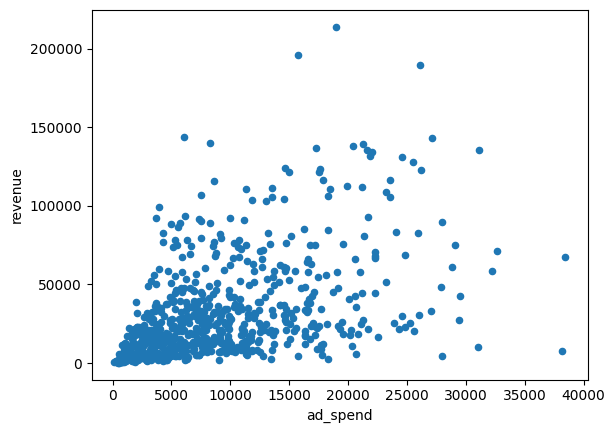

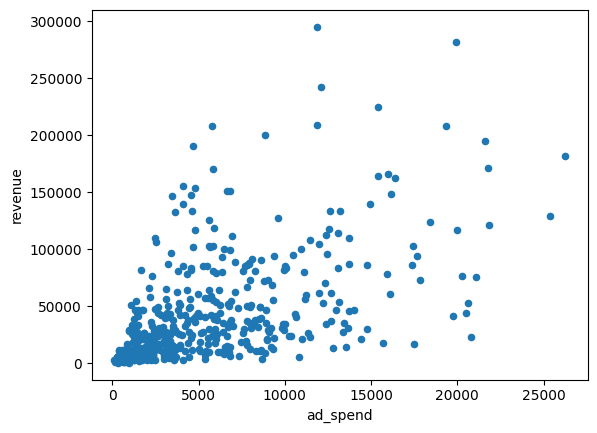

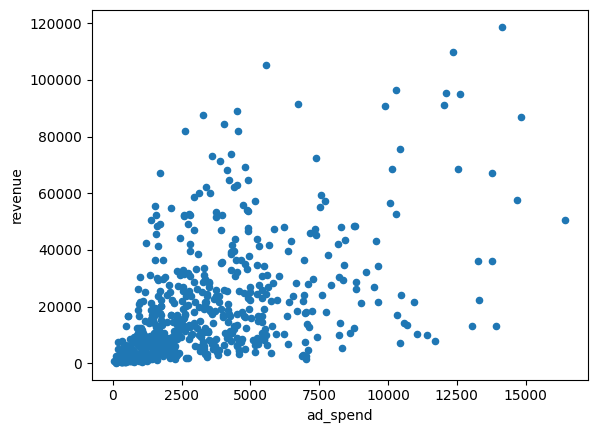

In [9]:
df_Google = df[df["platform"] == "Google Ads"]   
df_TikTok = df[df["platform"] == "TikTok Ads"]  
df_Meta = df[df["platform"] == "Meta Ads"]  
df_Google.plot.scatter(x='ad_spend', y='revenue')
df_TikTok.plot.scatter(x='ad_spend', y='revenue')
df_Meta.plot.scatter(x='ad_spend', y='revenue')

In [10]:
corr_google = df_Google["ad_spend"].corr(df_Google["revenue"])
corr_tiktok = df_TikTok["ad_spend"].corr(df_TikTok["revenue"])
corr_meta   = df_Meta["ad_spend"].corr(df_Meta["revenue"])

print("Google Ads:", round(corr_google,2))
print("TikTok Ads:", round(corr_tiktok,2))
print("Meta Ads:", round(corr_meta,2))

Google Ads: 0.5
TikTok Ads: 0.54
Meta Ads: 0.53


All platforms behave similarly under scale and we find that Spending more increases revenue, but not consistently. Since they scale the same it is best Allocate budget to the platform with highest median ROAS.

#### Does CTR convert directly to ROAS?

<Axes: xlabel='CTR', ylabel='ROAS'>

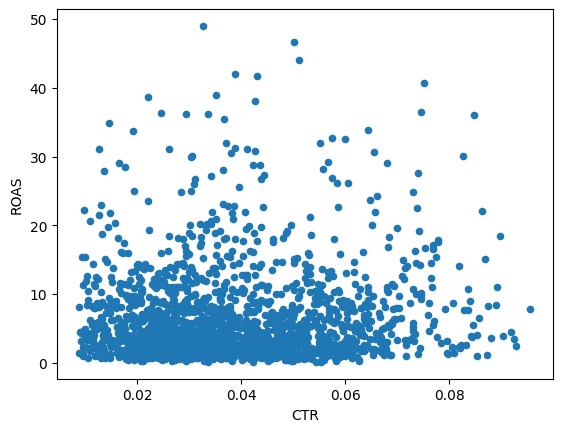

In [11]:
df.plot.scatter(x="CTR", y="ROAS")

In [12]:
float(df["CTR"].corr(df["ROAS"]))

0.07121505522241844

The correlation between CTR and ROAS indicates no meaningful relationship between the two metrics. Meaning that higher click-through rates do not translate into higher return on ad spend. As a result, CTR should not be an optimization or scaling metric.

#### How do Search, Video, Display, and Shopping compare on CTR,CPA,ROAS?

In [13]:
summary_table2 = (
    df
    .groupby("campaign_type")
    .agg(
        median_ROAS=("ROAS", "median"),
        median_CPA=("CPA", "median"),
        median_conversions=("conversions", "median")
    )
    .reset_index()
)

summary_table2

,campaign_type,median_ROAS,median_CPA,median_conversions
0,Display,4.330,32.60,137.0
1,Search,4.270,31.90,130.0
2,Shopping,4.080,34.19,135.0
3,Video,4.525,35.79,123.5


Search, Display, Shopping, and Video campaigns all show comparable performance across ROAS and CPA, with no channel clearly outperforming the others by a wide margin. Video delivers the highest median ROAS, indicating strong efficiency, but it also has the lowest median conversions. Overall, campaign type should be driven by campaign goals rather than returns from any single format.

#### Which industries have the highest ROAS?

In [14]:
summary_table3 = (
    df
    .groupby("industry")["ROAS"].median()
    .reset_index()
)

summary_table3

,industry,ROAS
0,E-commerce,4.070
1,EdTech,4.460
2,Fintech,4.100
3,Healthcare,4.355
4,SaaS,4.480


ROAS performance is fairly consistent across industries, with no single sector dramatically outperforming the others. SaaS and EdTech show the highest median ROAS, but overall, differences are modest, suggesting that industry alone is not a strong driver of ROAS.

#### Which platforms are best per industry?

In [15]:
industry_platform = df.pivot_table(
    values="ROAS",
    index="industry",
    columns="platform",
    aggfunc="median"
)
industry_platform

platform,Google Ads,Meta Ads,TikTok Ads
industry,,,
E-commerce,3.170,4.31,6.580
EdTech,3.000,5.80,6.750
Fintech,3.275,4.58,6.570
Healthcare,2.500,5.47,6.765
SaaS,3.330,5.22,7.730


<Axes: xlabel='platform', ylabel='industry'>

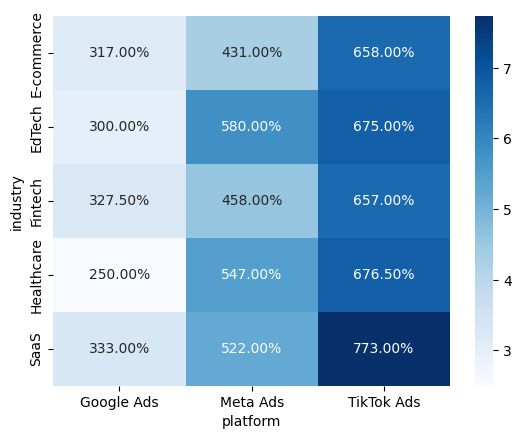

In [16]:
sns.heatmap(industry_platform, annot=True, cmap='Blues', fmt='.2%')

Across all industries, TikTok Ads consistently show the highest median ROAS, followed by Meta Ads, with Google Ads trailing in efficiency. The uniformity of results suggests platform efficiency matters more than industry

#### Which countries deliver the best ROAS?

In [17]:
summary_table4 = (
    df
    .groupby("country")
    .agg(
        median_roas=('ROAS', 'median'),  
        amount_traffic=('ROAS', 'count')  
    )
    .reset_index()
)

summary_table4.sort_values(by= 'median_roas', ignore_index=True)

,country,median_roas,amount_traffic
0,USA,3.695,266
1,Australia,4.175,232
2,Canada,4.245,262
3,UK,4.320,266
4,UAE,4.415,258
5,India,4.520,261
6,Germany,4.850,255


ROAS performance varies modestly by country, with Germany and India delivering the highest median ROAS, followed closely by the UAE and UK. The USA shows the lowest median ROAS among the countries analyzed, despite comparable traffic volume. Overall this indicates that geography influences efficiency at the margin.

#### Are there seasonal trends in CTR, CPA, or ROAS?

In [18]:
df['month'] = df['date'].dt.month

def month_to_season(month):
    if month in [12, 1, 2]:
        return 'winter'
    elif month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    else:
        return 'fall'

df['season'] = df['month'].apply(month_to_season)

In [19]:
summary_table5 = (
    df
    .groupby("season")
    .agg(
        median_ROAS=("ROAS", "median"),
        median_CPA=("CPA", "median"),
        median_conversions=("conversions", "median")
    )
    .reset_index()
)

summary_table5

,season,median_ROAS,median_CPA,median_conversions
0,fall,4.240,34.260,140.0
1,spring,4.190,33.000,121.0
2,summer,4.205,31.715,129.0
3,winter,4.505,34.670,135.0


Seasonal performance is largely stable across the year, with only modest variation in efficiency and volume. Winter shows the highest median ROAS, indicating slightly stronger return efficiency, though it also comes with the highest median CPA. Summer and Spring exhibit lower CPAs, suggesting more cost-efficient acquisition, while Fall delivers the highest median conversion volume.

#### What spend range produces the best marginal ROAS?

In [20]:
labels = [
    "Low Spend (≤2k)",
    "Mid-Low (2k–4k)",
    "Mid-High (4k–8k)",
    "High Spend (8k+)"
]
df["spend_bucket"] = pd.qcut(df["ad_spend"], q=4, labels=labels)
df.groupby("spend_bucket", observed=False)["ROAS"].median()

spend_bucket
Low Spend (≤2k)     5.795
Mid-Low (2k–4k)     5.110
Mid-High (4k–8k)    4.280
High Spend (8k+)    2.955
Name: ROAS, dtype: float64

ROAS declines with Higher spend, campaigns should be capped around 4k, with extreme caution beyond 8k due to sharp diminishing returns.

#### If we had $100k to spend, how should it be allocated?

In [21]:
grouped = (
    df
    .groupby(['season', 'platform', 'spend_bucket'], observed=True, as_index=False)
    .agg(
        roas=('ROAS', 'mean') 
    )
)
grouped.sort_values(by= 'roas', ignore_index=True, ascending=False)

,season,platform,spend_bucket,roas
0,spring,TikTok Ads,Low Spend (≤2k),14.898333
1,winter,TikTok Ads,Low Spend (≤2k),14.524516
2,fall,TikTok Ads,Low Spend (≤2k),13.815000
3,fall,TikTok Ads,Mid-High (4k–8k),11.705758
4,summer,TikTok Ads,Low Spend (≤2k),11.416087
5,spring,TikTok Ads,Mid-Low (2k–4k),10.463750
6,summer,TikTok Ads,Mid-Low (2k–4k),10.454286
7,winter,TikTok Ads,Mid-Low (2k–4k),9.780312
8,winter,TikTok Ads,Mid-High (4k–8k),9.642188
9,fall,TikTok Ads,Mid-Low (2k–4k),8.840000


Based on the combined analysis of seasonality, platform, and spend buckets, the highest ROAS consistently comes from TikTok Ads at low spend levels (≤ $2k), particularly during spring and winter. These segments show ROAS values in the 14–15 range, materially outperforming all other platform–season–spend combinations.

##### Recommended $100k Allocation (Strategy-Level)
- ~70–75% to TikTok Ads:
    - Deployed ~2k campaigns
    - Prioritized in spring and winter
    - Focus on low-spend efficiency rather than scale per campaign
- ~15–20% to Meta Ads:
    - Mainly low to mid-low spend buckets
    - Used for diversification and incremental reach
- ~5–10% to Google Ads:
    - Primarily defensive coverage
    - Lower ROAS across all seasons and spend levels, so limited allocation is justified

In [22]:
df.to_csv("global_ads_performance_dataset_cleaned.csv", index=False)